<a href="https://colab.research.google.com/github/lauuurynnn/Example-2/blob/main/Asignment6_Lauryn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Exploration and manipulation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv('salaries.csv')

In [ ]:
#1 Dataset overview

In [ ]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [ ]:
print(df)

         rank discipline  yrs.since.phd  yrs.service   sex  salary
0        Prof          B             19           18  Male  139750
1        Prof          B             20           16  Male  173200
2    AsstProf          B              4            3  Male   79750
3        Prof          B             45           39  Male  115000
4        Prof          B             40           41  Male  141500
..        ...        ...            ...          ...   ...     ...
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   81035

[397 rows x 6 columns]


In [ ]:
target_variable = "Salary"
print(f"\nTarget Variable: {target_variable}")


Target Variable: Salary


In [ ]:
#2 Check for missing values

In [ ]:
print(df.isnull().sum())

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64


In [ ]:
#3 Convert categorical variables

In [ ]:
df = pd.get_dummies(df, columns=['rank', 'discipline', 'sex'], drop_first=True)
df = df.astype(int)

In [ ]:
print(df)

     yrs.since.phd  yrs.service  salary  rank_AsstProf  rank_Prof  \
0               19           18  139750              0          1   
1               20           16  173200              0          1   
2                4            3   79750              1          0   
3               45           39  115000              0          1   
4               40           41  141500              0          1   
..             ...          ...     ...            ...        ...   
392             33           30  103106              0          1   
393             31           19  150564              0          1   
394             42           25  101738              0          1   
395             25           15   95329              0          1   
396              8            4   81035              1          0   

     discipline_B  sex_Male  
0               1         1  
1               1         1  
2               1         1  
3               1         1  
4               1    

In [ ]:
#4 Correlation analysis

Text(0.5, 1.0, 'Correlation Matrix')

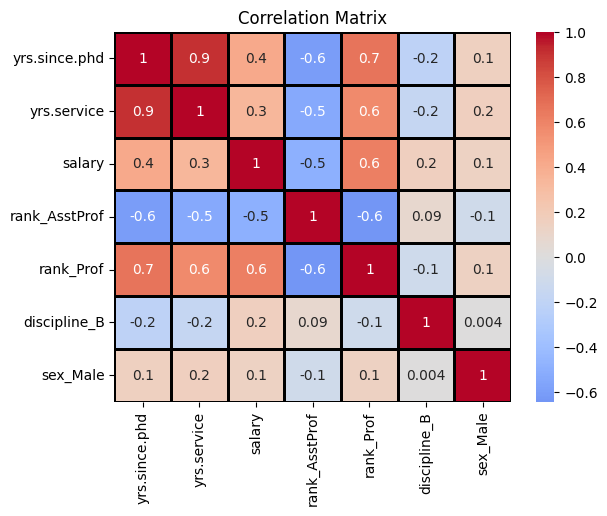

In [ ]:
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = "coolwarm",
            linewidths = 1,
            linecolor = 'black')
plt.title('Correlation Matrix')

In [ ]:
corr_matrix = df.corr()

In [ ]:
#5 Additional visualisation

In [ ]:
df= df.drop('yrs.service', axis=1)

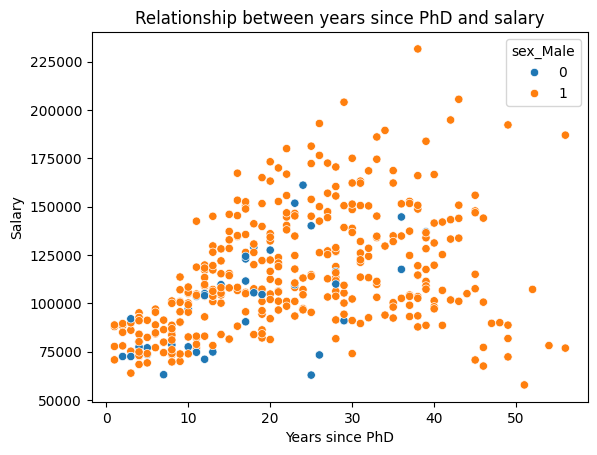

In [ ]:
sns.scatterplot(data=df, x='yrs.since.phd', y='salary', hue='sex_Male')
plt.title('Relationship between years since PhD and salary')
plt.xlabel('Years since PhD')
plt.ylabel('Salary')
plt.show()

2. Multilinear Regression Model

In [ ]:
#1 Preprocessing

In [ ]:
X = df.drop('salary', axis=1)
y = df['salary']
numerical_features = ['yrs.since.phd']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [ ]:
#2 Model creation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#3 Model summary

In [ ]:
X_train_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_train_sm)
sm_results = sm_model.fit()
print(sm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     49.64
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.06e-37
Time:                        22:49:32   Log-Likelihood:                -3631.1
No. Observations:                 317   AIC:                             7274.
Df Residuals:                     311   BIC:                             7297.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.076e+04   5278.389     15.301

In [ ]:
#4 Make predictions

In [ ]:
predictions_multilinear = model.predict(X_test)

results_multilinear = pd.DataFrame({
    'Actual': y_test.values.astype(int),
    'Predicted': predictions_multilinear.astype(int)
})
results_multilinear

,Actual,Predicted
0,105000,101068
1,174500,119039
2,176500,134326
3,99247,100883
4,134800,119118
...,...,...
75,74000,71544
76,117704,134247
77,138000,134221
78,145028,134300


In [ ]:
#5 Evaluate Model Performance:

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_pred = sm_results.predict(X_test_sm)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 15014.93311214362


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 21213.03640960543


In [ ]:
#6 Fine-Tuning

In [ ]:
significant_vars = ['yrs.since.phd', 'rank_Prof', 'discipline_B', 'sex_Male']

X_train_sig = X_train[significant_vars]
X_test_sig = X_test[significant_vars]

X_train_sig_sm = sm.add_constant(X_train_sig)
X_test_sig_sm = sm.add_constant(X_test_sig)

model_sig = sm.OLS(y_train, X_train_sig_sm).fit()

print(model_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     58.56
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           7.75e-37
Time:                        23:46:14   Log-Likelihood:                -3635.3
No. Observations:                 317   AIC:                             7281.
Df Residuals:                     312   BIC:                             7299.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.548e+04   5011.387     15.061

In [ ]:
y_pred_sig = model_sig.predict(X_test_sig_sm)

mae_sig = mean_absolute_error(y_test, y_pred_sig)
rmse_sig = np.sqrt(mean_squared_error(y_test, y_pred_sig))

print(f"MAE du modèle ajusté: {mae_sig}")
print(f"RMSE du modèle ajusté: {rmse_sig}")

MAE du modèle ajusté: 30120.074969100264
RMSE du modèle ajusté: 38309.41893331875


3. Tree regression model

In [ ]:
#1 Model creation

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=42)

In [ ]:
#2 Feature importance

In [ ]:
feature_importances = tree_model.feature_importances_

In [ ]:
importance_df = pd.DataFrame ({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)

         Feature  Importance
2      rank_Prof    0.568441
0  yrs.since.phd    0.287520
3   discipline_B    0.100475
1  rank_AsstProf    0.022368
4       sex_Male    0.021196


In [ ]:
#3 Predictions

In [ ]:
X2 = df.drop(columns=['rank_AsstProf', 'sex_Male', 'salary'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

In [ ]:
tree_model = DecisionTreeRegressor(random_state=42)

In [ ]:
tree_model.fit(X_train2, y_train2)

DecisionTreeRegressor(random_state=42)

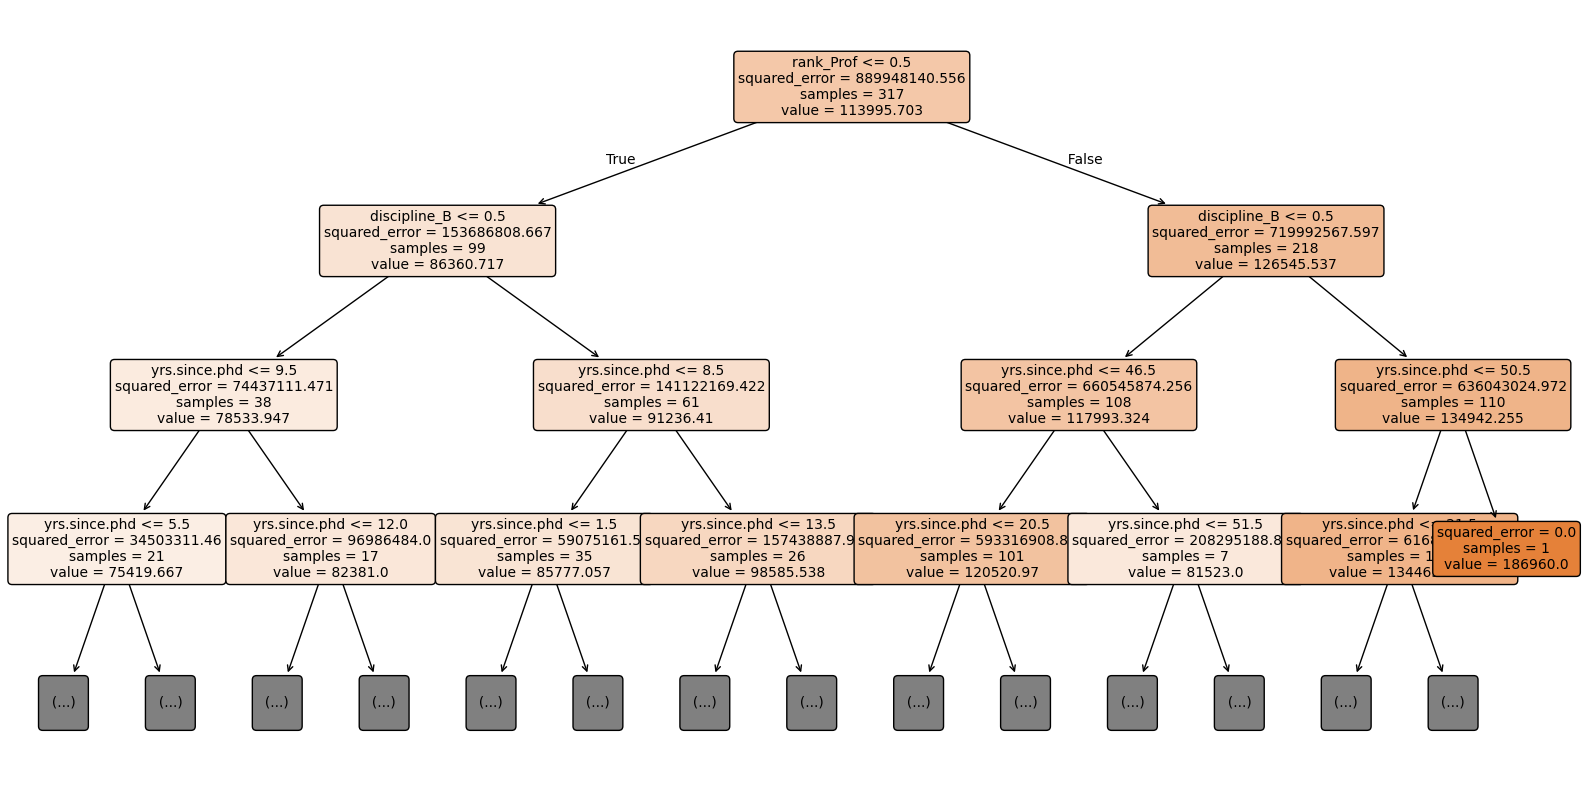

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure (figsize=(20, 10))
plot_tree(tree_model, feature_names=X2.columns, max_depth=3, filled=True, rounded=True, fontsize=10  )
plt.show()

In [ ]:
predictions_tree = tree_model.predict(X_test2)

In [ ]:
results_tree = pd.DataFrame({
    'Actual': y_test2.values.astype(int),
    'Predicted': predictions_tree.astype(int)
})

In [ ]:
results_multilinear

,Actual,Predicted
0,105000,101068
1,174500,119039
2,176500,134326
3,99247,100883
4,134800,119118
...,...,...
75,74000,71544
76,117704,134247
77,138000,134221
78,145028,134300


In [ ]:
# Evaluate Model Performance

In [ ]:
mae_tr = round(mean_absolute_error(y_test2, predictions_tree))
rmse_tr = round(np.sqrt(mean_squared_error(y_test2, predictions_tree)))

print("MAE:", mae_tr)
print("RMSE:", rmse_tr)

MAE: 19553
RMSE: 27991


4. Extra Mile

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [ ]:
mae_rf = round(mean_absolute_error(y_test, y_pred_rf))

In [ ]:
rmse_rf = round(np.sqrt(mean_squared_error(y_test, y_pred_rf)))

In [ ]:
print(f"Comparison of Model Performance:")
print(f"Linear Regression - MAE: {mae_sig}  RMSE: {rmse_sig}")
print(f"Tree Regression   - MAE: {mae_sig}  RMSE: {rmse_sig}")
print(f"Random Forest     - MAE: {mae_sig}  RMSE: {rmse_sig}")

Comparison of Model Performance:
Linear Regression - MAE: 30120.074969100264  RMSE: 38309.41893331875
Tree Regression   - MAE: 30120.074969100264  RMSE: 38309.41893331875
Random Forest     - MAE: 30120.074969100264  RMSE: 38309.41893331875


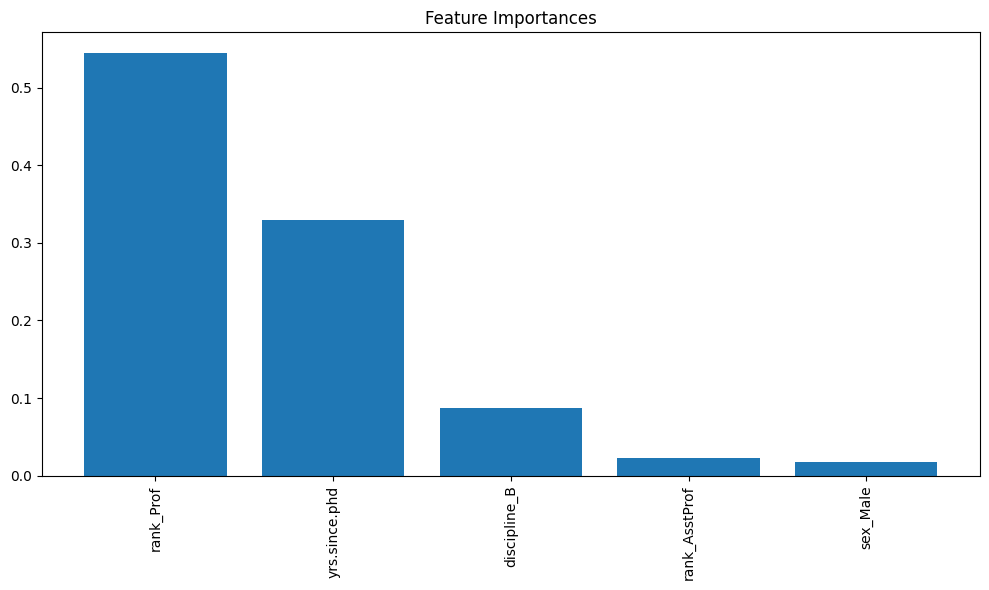

In [ ]:
import matplotlib.pyplot as plt

# Feature Importance Plot
importances = rf_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()